In [44]:
from fastquant import get_stock_data, backtest
from gaussian_hmm import *
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
params = {
    'n_components': 2, 
    'algorithm': 'map', 
    'n_iter': 100, 
    'd': 5,
    'name':'GHMM'
}

ghmm = GHMM(params=params)

In [46]:
# back testing dates on AAPL 2019-01-01 to 2020-05-31
back_test_data = get_stock_data('SPY', '2007-01-01', '2010-05-07')

[*********************100%***********************]  1 of 1 completed


In [47]:
# training data AAPL 2017-08-01 to 2019-01-01
training_data = get_stock_data('SPY', '2005-01-01', '2007-01-01')

[*********************100%***********************]  1 of 1 completed


In [48]:
ghmm.train(train_data=training_data)

In [49]:
preds,actual = ghmm.predict(test_data=back_test_data)

DONE842


<IPython.core.display.Javascript object>


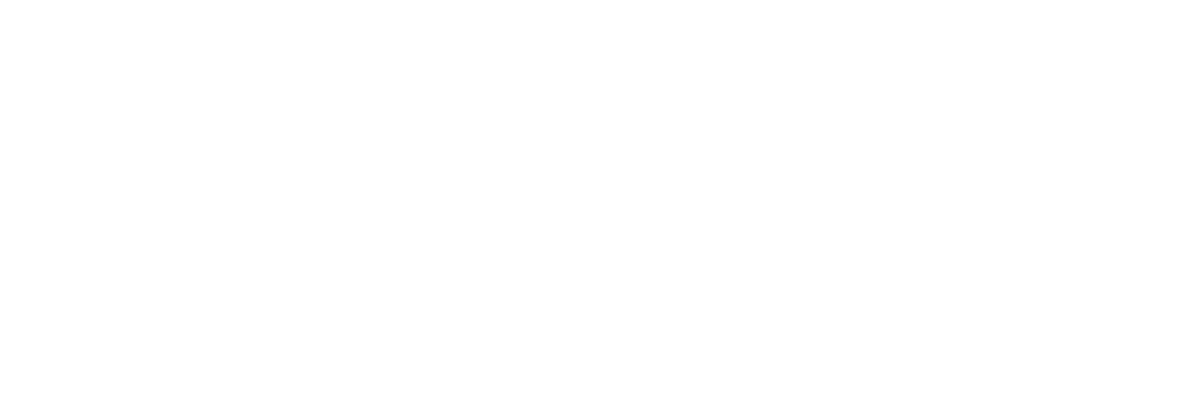

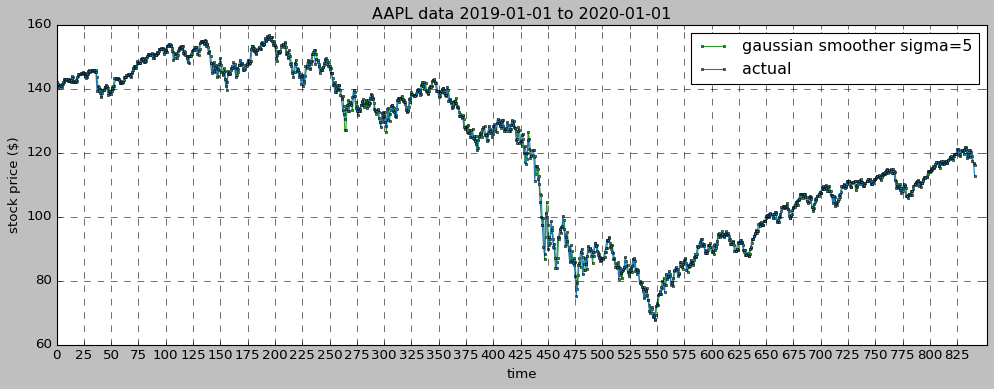

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('AAPL data 2019-01-01 to 2020-01-01')
time = range(len(preds))
ax.plot(time,preds,color='tab:green',marker='s',markersize=2,linestyle='-',linewidth=1,label='gaussian smoother sigma=5')
ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),25))
ax.set_xlim(0,len(preds)+10,)
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()

In [51]:
preds = pd.DataFrame(data=np.array(preds), columns=['yhat'])

In [52]:
expected_1day_return = preds['yhat'].pct_change().shift(-1).multiply(100)

In [53]:
expected_1day_return

0     -0.717050
1      0.070811
2     -0.360854
3      0.347955
4     -0.516592
         ...   
837   -1.240900
838   -0.309931
839   -2.058654
840   -0.257374
841         NaN
Name: yhat, Length: 842, dtype: float64

In [54]:
back_test_data['custom'] = expected_1day_return.multiply(-1).values

In [55]:
back_test_data

,open,high,low,close,volume,custom
dt,,,,,,
2007-01-03,142.250000,142.860001,140.570007,141.369995,94807600,0.717050
2007-01-04,141.229996,142.050003,140.610001,141.669998,69620600,-0.070811
2007-01-05,141.330002,141.399994,140.380005,140.539993,76645300,0.360854
2007-01-08,140.820007,141.410004,140.250000,141.190002,71655000,-0.347955
2007-01-09,141.309998,141.600006,140.399994,141.070007,75680100,0.516592
...,...,...,...,...,...,...
2010-04-30,120.879997,121.010002,118.779999,118.809998,270000900,1.240900
2010-05-03,119.379997,120.680000,119.199997,120.349998,182747900,0.309931
2010-05-04,119.010002,119.029999,116.919998,117.519997,360353400,2.058654


Starting Portfolio Value: 100000.00
2010-05-05, ===Global level arguments===
2010-05-05, init_cash : 100000
2010-05-05, buy_prop : 1
2010-05-05, sell_prop : 1
2010-05-05, commission : 0.0075
2010-05-05, stop_loss : 0
2010-05-05, stop_trail : 0
===Strategy level arguments===
Upper limit:  3
Lower limit:  -2
2010-05-05, Final Portfolio Value: 69918.58805706023
2010-05-05, Final PnL: -30081.41
Time used (seconds): 0.4823284149169922
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	upper_limit:3	lower_limit:-2	custom_column:custom
Returns	rtot:-0.3578386485366371	ravg:-0.00042549185319457446	rnorm:-0.1016755266132405	rnorm100:-10.16755266132405
Sharpe	sharpera

<IPython.core.display.Javascript object>


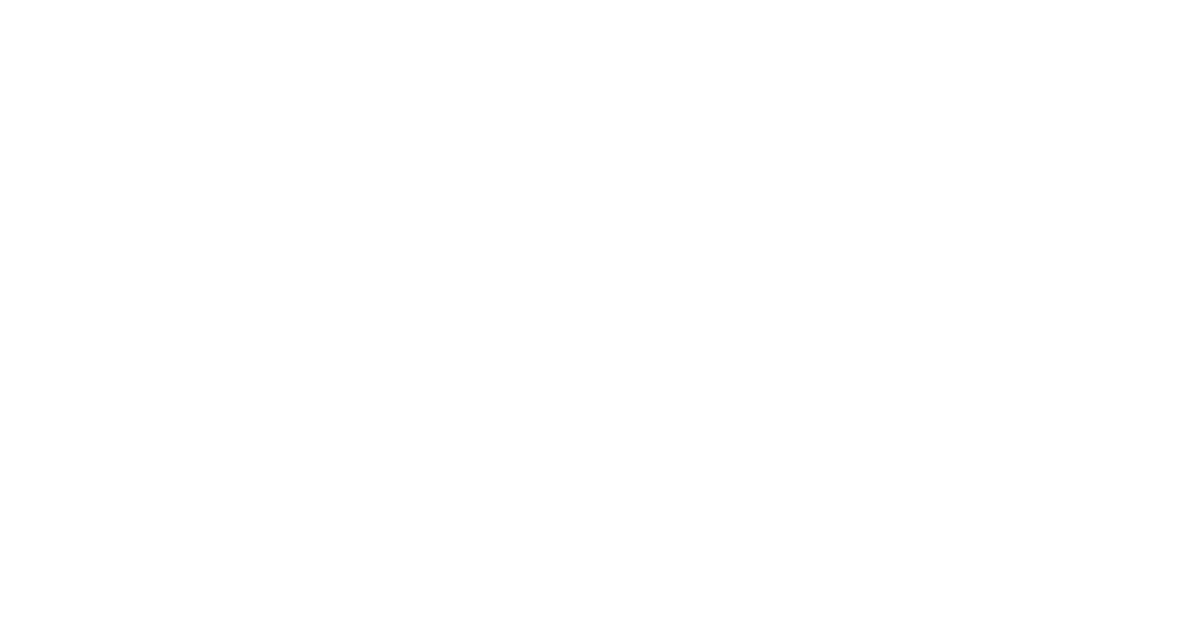

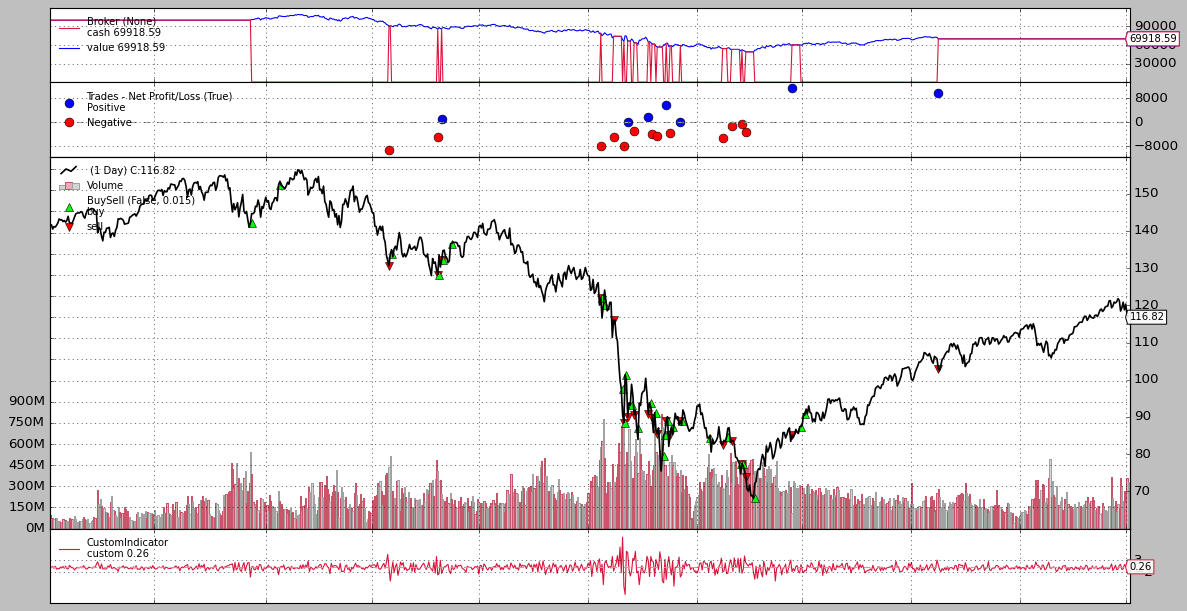

In [56]:
history = backtest("custom", back_test_data.dropna(),upper_limit=3, lower_limit=-2, buy_prop=1, sell_prop=1, return_history=True, execution_type='close', figsize=(15,8))


In [57]:
history

(   strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
 0         0     100000         1          1      0.0075          0   
 
    stop_trail execution_type channel symbol  ...   rnorm100  len  drawdown  \
 0           0          close                 ... -10.167553  647  36.02056   
 
       moneydown                                                max  \
 0  39364.313468  {'len': 647, 'drawdown': 55.18451849440978, 'm...   
 
    maxdrawdown maxdrawdownperiod  sharperatio       pnl   final_value  
 0    55.184518               647    -0.302734 -30081.41  69918.588057  
 
 [1 rows x 30 columns],
 {'orders':     strat_id                                         strat_name         dt  \
  0          0  buy_prop1_sell_prop1_execution_typeclose_upper... 2007-08-17   
  1          0  buy_prop1_sell_prop1_execution_typeclose_upper... 2007-09-19   
  2          0  buy_prop1_sell_prop1_execution_typeclose_upper... 2008-01-22   
  3          0  buy_prop1_sell_prop1_execution_typ

In [58]:
from simple_moving_average import *

In [60]:
sma = SMA(params={'d':3, 'name':'SMA-3'})

In [61]:
sma.train(train_data=training_data)

In [63]:
preds,actual = sma.predict(test_data=back_test_data)

DONE842


<IPython.core.display.Javascript object>


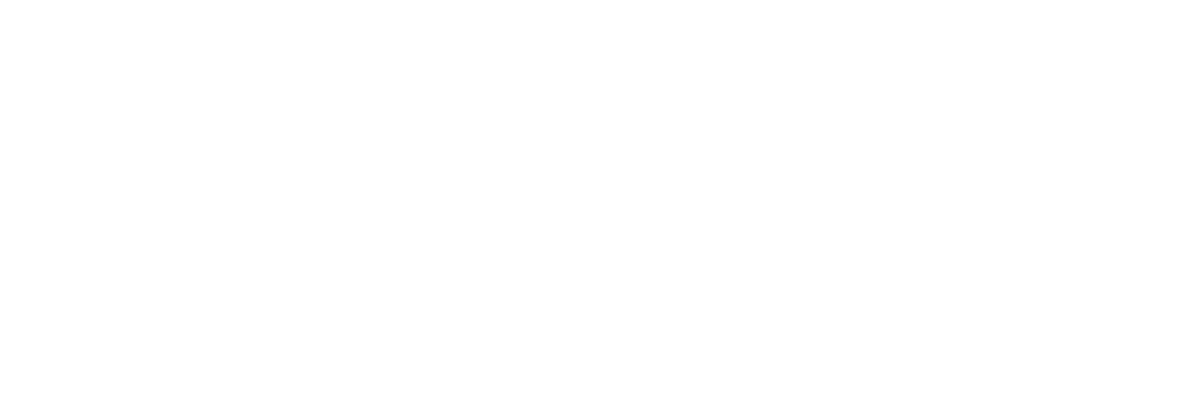

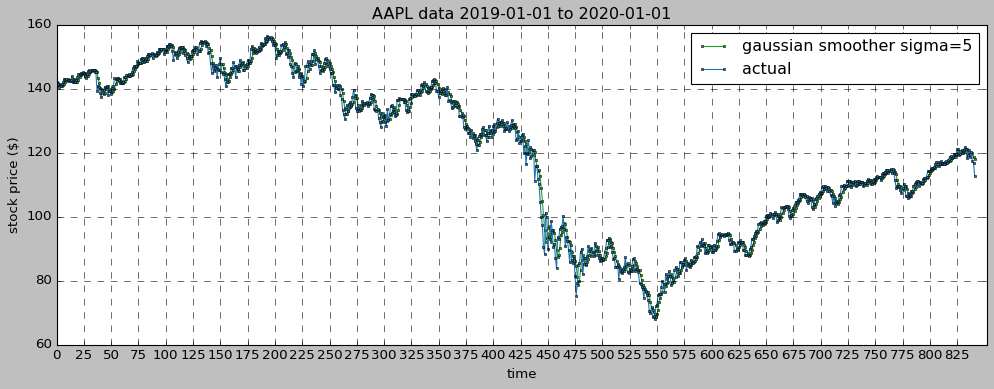

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('AAPL data 2019-01-01 to 2020-01-01')
time = range(len(preds))
ax.plot(time,preds,color='tab:green',marker='s',markersize=2,linestyle='-',linewidth=1,label='gaussian smoother sigma=5')
ax.plot(time,actual,color='tab:blue',marker='s',markersize=2,linestyle='-',linewidth=1,label='actual')
ax.set_xlabel('time')
ax.set_ylabel('stock price ($)')
ax.set_xticks(np.arange(0,len(preds),25))
ax.set_xlim(0,len(preds)+10,)
ax.xaxis.grid(True,ls='--')
ax.yaxis.grid(True,ls='--')
ax.legend()
plt.show()

In [65]:
preds = pd.DataFrame(data=np.array(preds), columns=['yhat'])

In [66]:
expected_1day_return = preds['yhat'].pct_change().shift(-1).multiply(100)

In [67]:
back_test_data['custom'] = expected_1day_return.multiply(-1).values

Starting Portfolio Value: 100000.00
2010-05-05, ===Global level arguments===
2010-05-05, init_cash : 100000
2010-05-05, buy_prop : 1
2010-05-05, sell_prop : 1
2010-05-05, commission : 0.0075
2010-05-05, stop_loss : 0
2010-05-05, stop_trail : 0
===Strategy level arguments===
Upper limit:  3
Lower limit:  -2
2010-05-05, Final Portfolio Value: 94330.76989990234
2010-05-05, Final PnL: -5669.23
Time used (seconds): 0.45078229904174805
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['custom']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	upper_limit:3	lower_limit:-2	custom_column:custom
Returns	rtot:-0.05836275158817107	ravg:-6.939685087773017e-05	rnorm:-0.01733597874721806	rnorm100:-1.733597874721806
Sharpe	sharper

<IPython.core.display.Javascript object>


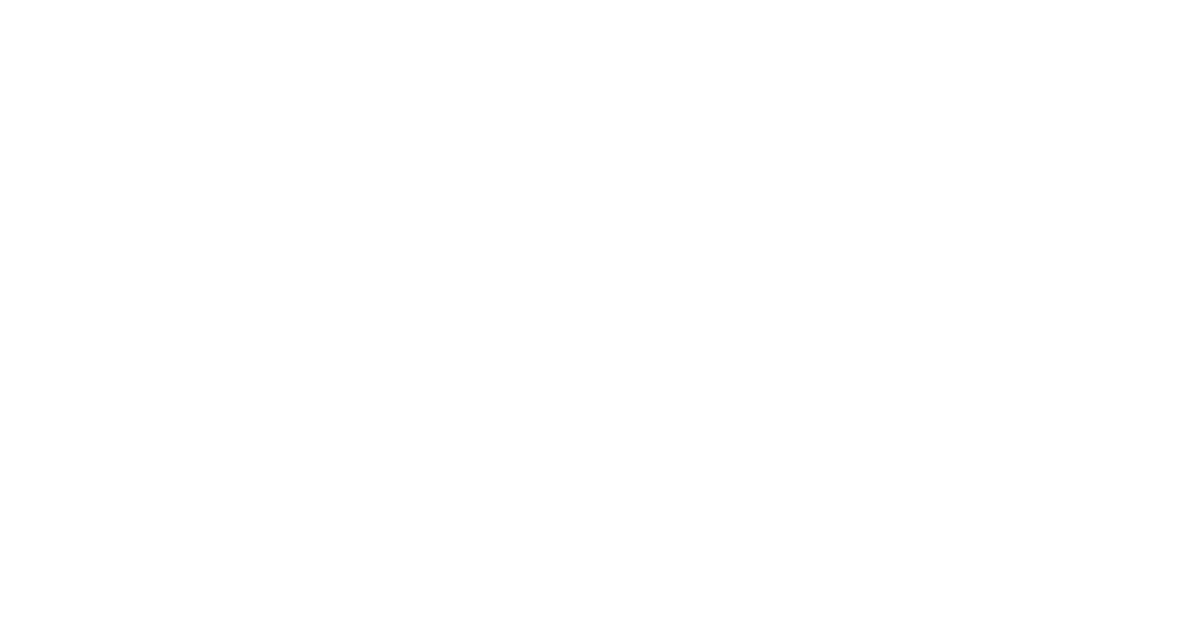

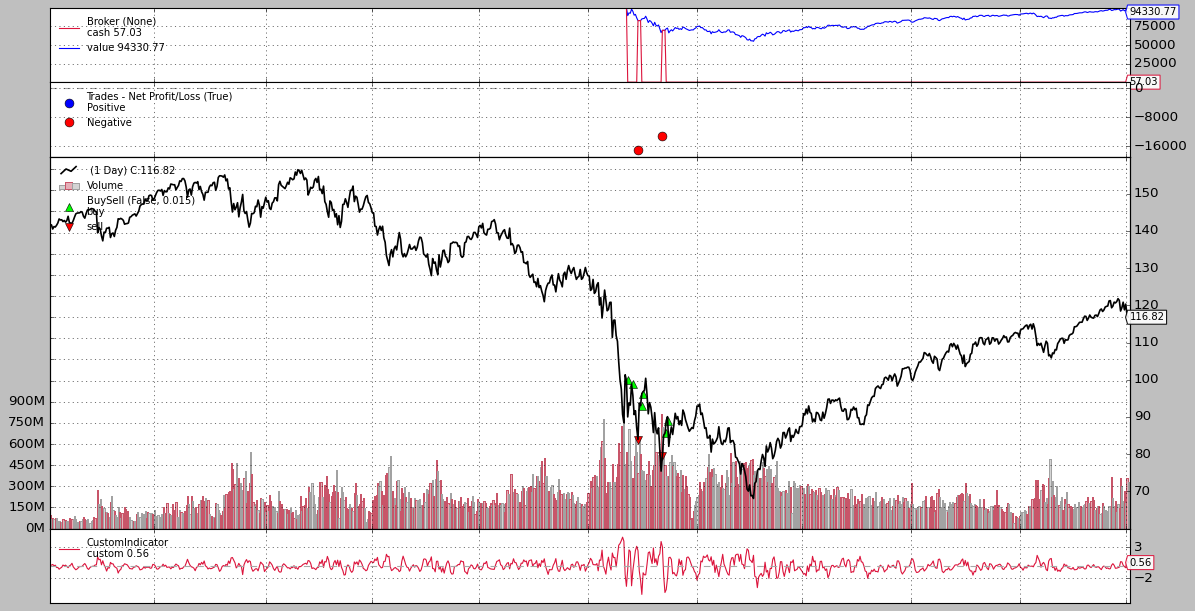

In [68]:
history = backtest("custom", back_test_data.dropna(),upper_limit=3, lower_limit=-2, buy_prop=1, sell_prop=1, return_history=True, execution_type='close', figsize=(15,8))


In [69]:
history

(   strat_id  init_cash  buy_prop  sell_prop  commission  stop_loss  \
 0         0     100000         1          1      0.0075          0   
 
    stop_trail execution_type channel symbol  ...  rnorm100  len  drawdown  \
 0           0          close                 ... -1.733598  391   5.66923   
 
    moneydown                                                max  maxdrawdown  \
 0  5669.2301  {'len': 391, 'drawdown': 44.97819936126708, 'm...    44.978199   
 
   maxdrawdownperiod  sharperatio      pnl  final_value  
 0               391    -0.038967 -5669.23   94330.7699  
 
 [1 rows x 30 columns],
 {'orders':    strat_id                                         strat_name         dt  \
  0         0  buy_prop1_sell_prop1_execution_typeclose_upper... 2008-10-15   
  1         0  buy_prop1_sell_prop1_execution_typeclose_upper... 2008-10-21   
  2         0  buy_prop1_sell_prop1_execution_typeclose_upper... 2008-10-27   
  3         0  buy_prop1_sell_prop1_execution_typeclose_upper... 2